<a href="https://colab.research.google.com/github/HugoStigletz/Data-Analytics-Portfolio/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=d1129814e8244dbf2954a1588d85b3d77bb5ab53842f07a4367d2e873f07c5a2
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [1]:
pip install matplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pytrends.request import TrendReq

#create a pytrends object. request data from Google Trends
pytrends = TrendReq(hl='en-US')

#extract data about keywords
keywords = ['Python', 'R', 'C++', 'Java', 'HTML']
pytrends.build_payload(keywords, timeframe='today 5-y')

#specify and get data
data = pytrends.interest_over_time()
data

,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2017-07-23,18,59,76,30,14,False
2017-07-30,18,61,77,30,14,False
2017-08-06,18,58,75,27,14,False
2017-08-13,17,60,76,27,14,False
2017-08-20,17,57,77,29,14,False
...,...,...,...,...,...,...
2022-06-12,26,50,90,21,11,False
2022-06-19,27,48,87,21,11,False
2022-06-26,25,61,84,20,11,False


In [4]:
type(data)

pandas.core.frame.DataFrame

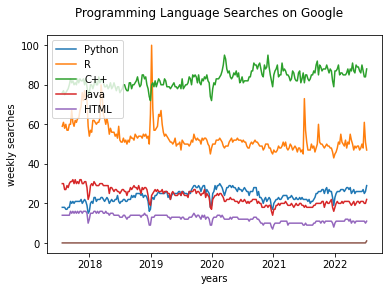

In [8]:
#plot data
import matplotlib.pyplot as plt

plt.plot(data)

#add titles
plt.suptitle('Programming Language Searches on Google')
plt.xlabel('years')
plt.ylabel('weekly searches')

#add legend
plt.legend(keywords, loc='upper left')
plt.show()
#plt.savefig('data.png')

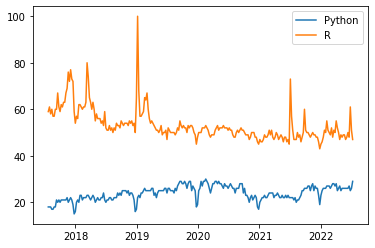

In [10]:
#analyzze data
focus = ["Python", "R"]

plt.plot(data[focus])
plt.legend(focus)

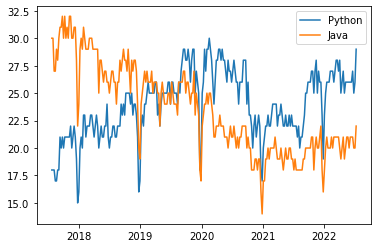

In [11]:
#analyzze data
focus = ["Python", "Java"]

plt.plot(data[focus])
plt.legend(focus)

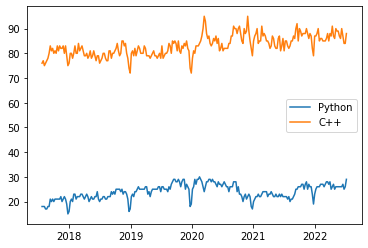

In [12]:
#analyzze data
focus = ["Python", "C++"]

plt.plot(data[focus])
plt.legend(focus)

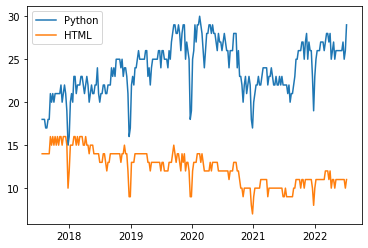

In [14]:
#analyzze data
focus = ["Python", "HTML"]

plt.plot(data[focus])
plt.legend(focus)

In [15]:
#extract country-level data about the keywords
data2 = pytrends.interest_by_region(resolution= 'COUNTRY', inc_low_vol=True)

#get countries with the most searches of "Python" over the years
data2 = data2['Python'].nlargest(10)
data2

geoName
China          50
Eritrea        40
Israel         36
St. Helena     31
Singapore      25
South Korea    25
Russia         24
Iceland        22
Taiwan         22
Hong Kong      21
Name: Python, dtype: int64

In [16]:
type(data2)

pandas.core.series.Series

In [17]:
#convert to Dataframe
data2 = data2.to_frame()
data2

,Python
geoName,
China,50
Eritrea,40
Israel,36
St. Helena,31
Singapore,25
South Korea,25
Russia,24
Iceland,22
Taiwan,22


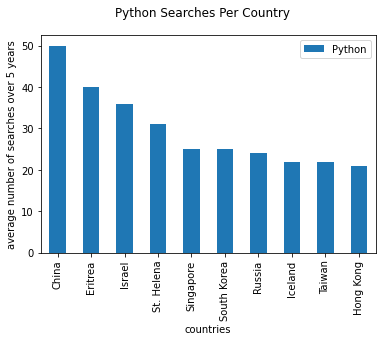

In [21]:
#plot bar chart WITH PANDAS
data2.plot(kind='bar')

#add titles
plt.suptitle('Python Searches Per Country')
plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [23]:
#plot a bar chart with muliple keywords
data3 = pytrends.interest_by_region(resolution= 'COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,14,14,50,14,8
Curaçao,7,33,48,6,6
Cyprus,14,22,45,11,8
Czechia,15,23,42,12,8
Côte d’Ivoire,6,16,51,22,5


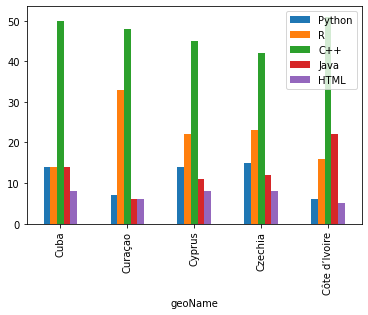

In [24]:
data3.plot(kind='bar')